In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error,classification_report
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
from sklearn.datasets import load_breast_cancer
from scipy.stats import mode
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
from torch.optim import Adam
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

# Linear Regression

In [3]:
data = pd.read_csv("data1.csv")

In [4]:
data

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93
...,...,...
115,14,85
116,16,66
117,16,79
118,18,77


In [5]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=69)

In [7]:
x_train = x_train.flatten()
x_test= x_test.flatten()
y_train = y_train.flatten()
y_test = y_test.flatten()

#### m= sum(x*y - mean_y*x) / sum(x*x - x_mean*x)

#### c = y_mean - m*x_mean

In [8]:
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)

In [9]:
m = sum(x_train*y_train - y_mean*x_train) / sum(x_train*x_train - x_mean*x_train)

In [10]:
c = y_mean - m * x_mean

In [11]:
(m,c)

(3.3155106445599896, 28.313875535498255)

In [12]:
y_pred = m*x_test + c

In [13]:
mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred)

(7.552437947611106, 83.17876833257597, 0.2654045141705216, 0.1003378124711236)

## Linear Regression USING GRADIENT

In [14]:
def linearregression(x,y):
    rate = 0.001
    iters = 10000
    m = 0
    c = 0
    n = len(x)
    for _ in range(iters):
        y_pred = x*m + c
        error = y_pred - y
        dm = (1/n) * np.dot(x.T,error)
        dc = (1/n) * np.sum(error)
        m -= rate*dm
        c -= rate*dc
    return m,c            

In [15]:
m,c = linearregression(x_train,y_train)

In [16]:
y_pred = x_test*m + c

In [17]:
mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred)

(8.580773228653154,
 96.95650080230271,
 0.14372610656582874,
 0.11141343211170748)

#

#

# Multiple Linear Regression

In [18]:
data = pd.read_csv("house_pred.csv")
test = pd.read_csv("test.csv")

In [19]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
num = data.select_dtypes(exclude="object")

In [24]:
corr = data.corr()["SalePrice"]
print(corr)
corr = corr[abs(corr)>0.5].sort_values()

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [26]:
corr = pd.DataFrame(corr)
corr

,SalePrice
YearRemodAdd,0.507101
YearBuilt,0.522897
TotRmsAbvGrd,0.533723
FullBath,0.560664
1stFlrSF,0.605852
TotalBsmtSF,0.613581
GarageArea,0.623431
GarageCars,0.640409
GrLivArea,0.708624
OverallQual,0.790982


In [27]:
corr_col = corr.T.columns
corr_col

Index(['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF',
       'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual',
       'SalePrice'],
      dtype='object')

In [28]:
num = num[corr_col]
num

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,2003,2003,8,2,856,856,548,2,1710,7,208500
1,1976,1976,6,2,1262,1262,460,2,1262,6,181500
2,2002,2001,6,2,920,920,608,2,1786,7,223500
3,1970,1915,7,1,961,756,642,3,1717,7,140000
4,2000,2000,9,2,1145,1145,836,3,2198,8,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,2000,1999,7,2,953,953,460,2,1647,6,175000
1456,1988,1978,7,2,2073,1542,500,2,2073,6,210000
1457,2006,1941,9,2,1188,1152,252,1,2340,7,266500
1458,1996,1950,5,1,1078,1078,240,1,1078,5,142125


In [26]:
num.isna().sum()

YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
SalePrice       0
dtype: int64

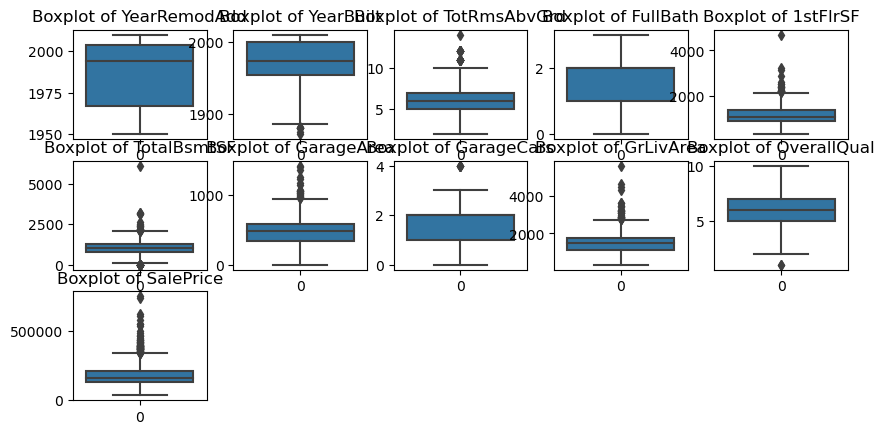

In [29]:
plt.figure(figsize=(10, 8))
for index,col in enumerate (num):
    plt.subplot(5,5,index+1)
    plt.subplots_adjust(top=0.9)
    sns.boxplot(num.loc[:,col])
    plt.title('Boxplot of {}'.format(col))

In [30]:
data = num.copy()

In [31]:
# Remove Outliers
# YearBuilt < 1900
# TotRmsAbvGrd > 10
# 1stFlrSF > 2000
# TotalBsmtSF > 2000 and < 0
# GarageArea > 900
# GrLivArea > 3000

data.drop(data[data["YearBuilt"] < 1900].index,inplace = True)
data.drop(data[data["TotRmsAbvGrd"] > 10].index,inplace = True)
data.drop(data[data["1stFlrSF"] > 2000].index,inplace = True)
data.drop(data[data["TotalBsmtSF"] > 2000].index,inplace = True)
data.drop(data[data["TotalBsmtSF"] < 0].index,inplace = True)
data.drop(data[data["GarageArea"] > 900].index,inplace = True)
data.drop(data[data["GrLivArea"] > 3000].index,inplace = True)

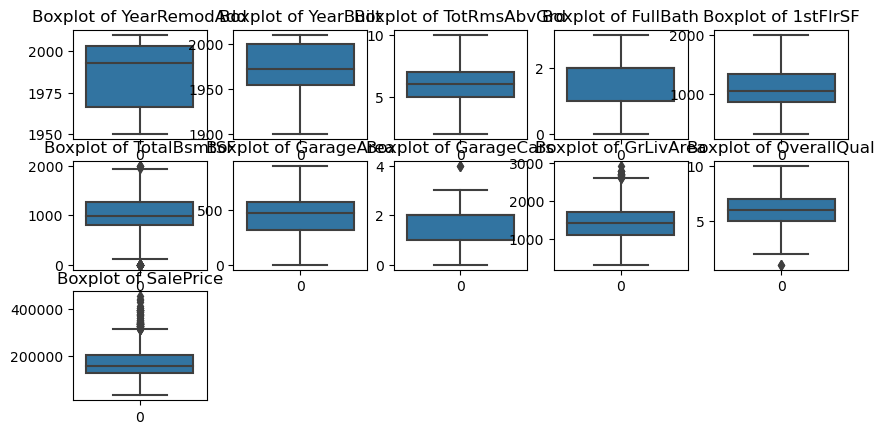

In [32]:
plt.figure(figsize=(10, 8))
for index,col in enumerate (data):
    plt.subplot(5,5,index+1)
    plt.subplots_adjust(top=0.9)
    sns.boxplot(data.loc[:,col])
    plt.title('Boxplot of {}'.format(col))

In [31]:
data

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,2003,2003,8,2,856,856,548,2,1710,7,208500
1,1976,1976,6,2,1262,1262,460,2,1262,6,181500
2,2002,2001,6,2,920,920,608,2,1786,7,223500
3,1970,1915,7,1,961,756,642,3,1717,7,140000
4,2000,2000,9,2,1145,1145,836,3,2198,8,250000
...,...,...,...,...,...,...,...,...,...,...,...
1454,2005,2004,6,2,1221,1221,400,2,1221,7,185000
1455,2000,1999,7,2,953,953,460,2,1647,6,175000
1457,2006,1941,9,2,1188,1152,252,1,2340,7,266500
1458,1996,1950,5,1,1078,1078,240,1,1078,5,142125


In [32]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [33]:
x = pd.DataFrame(x)
x.columns = list(data.columns)[:-1]
x

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,2003,2003,8,2,856,856,548,2,1710,7
1,1976,1976,6,2,1262,1262,460,2,1262,6
2,2002,2001,6,2,920,920,608,2,1786,7
3,1970,1915,7,1,961,756,642,3,1717,7
4,2000,2000,9,2,1145,1145,836,3,2198,8
...,...,...,...,...,...,...,...,...,...,...
1454,2005,2004,6,2,1221,1221,400,2,1221,7
1455,2000,1999,7,2,953,953,460,2,1647,6
1457,2006,1941,9,2,1188,1152,252,1,2340,7
1458,1996,1950,5,1,1078,1078,240,1,1078,5


In [34]:
x["intercept"] = 1

In [35]:
def vif_test(x):
    vif = pd.DataFrame()
    vif["Columns"] = x.columns
    vif["vif_score"] = None
    for i in range(x.shape[1]):
        vif["vif_score"][i]=variance_inflation_factor(x.values,i)
    return vif    

In [36]:
print(vif_test(x))

         Columns     vif_score
0   YearRemodAdd      1.768007
1      YearBuilt      2.478757
2   TotRmsAbvGrd      3.039241
3       FullBath        2.1063
4       1stFlrSF       3.08787
5    TotalBsmtSF      3.187992
6     GarageArea      5.317103
7     GarageCars      5.713387
8      GrLivArea      4.247094
9    OverallQual      2.627275
10     intercept  17047.250562


In [37]:
x.drop(columns="GarageCars",inplace=True)

In [38]:
print(vif_test(x))

        Columns     vif_score
0  YearRemodAdd      1.767064
1     YearBuilt      2.436066
2  TotRmsAbvGrd       3.02094
3      FullBath      2.095444
4      1stFlrSF      3.087359
5   TotalBsmtSF      3.176099
6    GarageArea      1.759088
7     GrLivArea      4.245633
8   OverallQual      2.589409
9     intercept  16753.725073


In [39]:
used_features = x.columns

In [40]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [41]:
print(reg.coef_)
print(reg.intercept_)

[ 3.51437665e+02  2.78907270e+02 -2.20819086e+03 -9.08227808e+03
  1.16437986e+01  2.78232356e+01  3.79434062e+01  6.34269751e+01
  1.56113499e+04  0.00000000e+00]
-1291144.751683632


###### Test

In [42]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1205,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
1,1206,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2,1207,20,RH,NaN,8900,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal
3,1208,20,RL,70.0,9135,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
4,1209,20,RL,70.0,7763,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal


In [43]:
test["intercept"] = 1

In [44]:
test = test[used_features]

In [45]:
test.isnull().sum()

YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GrLivArea       0
OverallQual     0
intercept       0
dtype: int64

In [46]:
y_pred = reg.predict(test)

# Logistic Regression

In [47]:
data = pd.read_csv("train_2.csv")

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [49]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [50]:
data["education"].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [51]:
data["education"].bfill(inplace=True)

In [52]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [53]:
grp = data.groupby(["avg_training_score","region"])

In [54]:
data["previous_year_rating"] = grp["previous_year_rating"].transform(lambda x:x.fillna(x.mean()))

In [55]:
data.drop(columns="employee_id",inplace=True)

In [56]:
data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    7
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54801 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [58]:
obj = data.select_dtypes(include="object")

In [59]:
for i in obj.columns:
    print(data[i].unique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
["Master's & above" "Bachelor's" 'Below Secondary']
['f' 'm']
['sourcing' 'other' 'referred']


In [60]:
for i in ["department","gender"]:
    x = pd.get_dummies(data[i],drop_first=True)
    data=data.join(x)
    data.drop(columns=i,inplace=True)

In [61]:
data

,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,m
0,region_7,Master's & above,sourcing,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0
1,region_22,Bachelor's,other,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,1
2,region_19,Bachelor's,sourcing,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,1
3,region_23,Bachelor's,other,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,1
4,region_26,Bachelor's,other,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,region_14,Bachelor's,sourcing,1,48,3.0,17,0,0,78,0,0,0,0,0,0,0,0,1,1
54804,region_27,Master's & above,other,1,37,2.0,6,0,0,56,0,0,0,0,1,0,0,0,0,0
54805,region_1,Bachelor's,other,1,27,5.0,3,1,0,79,0,0,0,0,0,0,0,0,0,1
54806,region_9,Bachelor's,sourcing,1,29,1.0,2,0,0,45,0,0,0,0,0,0,0,1,0,1


In [62]:
e = LabelEncoder()

In [63]:
data["education"] = e.fit_transform(data["education"])

In [64]:
data["recruitment_channel"] = e.fit_transform(data["recruitment_channel"])

In [65]:
data

,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,m
0,region_7,2,2,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0
1,region_22,0,0,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,1
2,region_19,0,2,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,1
3,region_23,0,0,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,1
4,region_26,0,0,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,region_14,0,2,1,48,3.0,17,0,0,78,0,0,0,0,0,0,0,0,1,1
54804,region_27,2,0,1,37,2.0,6,0,0,56,0,0,0,0,1,0,0,0,0,0
54805,region_1,0,0,1,27,5.0,3,1,0,79,0,0,0,0,0,0,0,0,0,1
54806,region_9,0,2,1,29,1.0,2,0,0,45,0,0,0,0,0,0,0,1,0,1


In [66]:
data.columns

Index(['region', 'education', 'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'Finance', 'HR',
       'Legal', 'Operations', 'Procurement', 'R&D', 'Sales & Marketing',
       'Technology', 'm'],
      dtype='object')

In [67]:
data = data[['region', 'education', 'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'Finance', 'HR',
       'Legal', 'Operations', 'Procurement', 'R&D', 'Sales & Marketing',
       'Technology', 'm','is_promoted']]

In [68]:
data["previous_year_rating"] = data["previous_year_rating"].bfill()

In [69]:
data["region"] = data["region"].transform(lambda x: int(x.split("_")[1]))

In [70]:
data.isna().sum()

region                  0
education               0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
Finance                 0
HR                      0
Legal                   0
Operations              0
Procurement             0
R&D                     0
Sales & Marketing       0
Technology              0
m                       0
is_promoted             0
dtype: int64

In [71]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=69)

In [73]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [74]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred = logistic.predict(x_test)

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.96     15055
           1       0.85      0.26      0.40      1388

    accuracy                           0.93     16443
   macro avg       0.89      0.63      0.68     16443
weighted avg       0.93      0.93      0.92     16443



# Logistic regression from scratch

In [77]:
x,y = load_breast_cancer(return_X_y=True)


In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=69)

In [79]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [80]:
def logistic_regression(x,y):
    rate = 0.01
    iters = 10000 
    weights = np.zeros(x.shape[1])
    for i in range(iters):
        y_pred = sigmoid(x.dot(weights))
        error = y_pred - y
        gradient = x.T.dot(error)
        weights -=rate*gradient
    return weights

In [81]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [82]:
weights = logistic_regression(x_train,y_train)
weights

array([  3.23705603,  -0.25872863,   2.19553617,   2.21005546,
        -3.04217165,   7.19665355,  -8.73934181,  -2.04487007,
         0.56833371,  -1.26074759, -10.44717825,   2.61120392,
         4.67024216,  -6.55688815,  -1.03945723,  -6.18799968,
         5.72860707,  -5.01791828,   2.04511651,   9.80460192,
        -7.08617038,  -4.56141209,  -2.2125965 ,  -6.22329476,
         2.69467082,   4.47604104,  -4.33829282,  -2.38798838,
        -1.09433803,  -6.35029392])

In [83]:
y_pred = np.round(sigmoid(x_test.dot(weights)))

In [84]:
np.mean(y_pred == y_test)

0.4502923976608187

In [85]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [86]:
y_pred = logistic.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        77
           1       0.00      0.00      0.00        94

    accuracy                           0.45       171
   macro avg       0.23      0.50      0.31       171
weighted avg       0.20      0.45      0.28       171



# Mobile prediction dataset

In [87]:
data = pd.read_csv("mobile_price_classification.csv")

In [88]:
data.isna().sum()

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores          159
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        1841 non-null   object 
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [90]:
data["n_cores"][13]=0

In [91]:
data["n_cores"].ffill(inplace=True)

In [92]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=69)

### Naive Bayes

In [94]:
naive = GaussianNB()
naive.fit(x_train,y_train)
y_pred = naive.predict(x_test)
print(naive.score(x_test,y_test))
print(classification_report(y_pred,y_test))

0.785
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       135
           1       0.67      0.69      0.68       150
           2       0.69      0.71      0.70       154
           3       0.92      0.88      0.90       161

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



In [95]:
cross = cross_val_score(naive,x,y,cv=10,scoring="accuracy")
np.mean(cross)

0.813

### KNN

In [96]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(knn.score(x_test,y_test))
print(classification_report(y_pred,y_test))

0.92
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       139
           1       0.91      0.89      0.90       157
           2       0.88      0.93      0.90       149
           3       0.95      0.95      0.95       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [97]:
cross = cross_val_score(knn,x,y,cv=10,scoring="accuracy")
cross.mean()

0.9235000000000001

### Linear Regression

In [98]:
linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
print(linear.score(x_test,y_test))
print(mean_squared_error(y_test,y_pred))

0.9090259780390341
0.11042628950115291


### SVM

In [99]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(svm.score(x_test,y_test))
print(classification_report(y_pred,y_test))

0.9366666666666666
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       139
           1       0.95      0.90      0.92       161
           2       0.86      0.96      0.91       141
           3       0.97      0.94      0.96       159

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [100]:
cross = cross_val_score(svm,x,y,cv=10,scoring="accuracy")
np.mean(cross)

0.9495000000000001

### Tree

In [101]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print(tree.score(x_test,y_test))
print(classification_report(y_pred,y_test))

0.825
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       139
           1       0.75      0.76      0.75       150
           2       0.71      0.80      0.75       140
           3       0.95      0.86      0.90       171

    accuracy                           0.82       600
   macro avg       0.83      0.82      0.82       600
weighted avg       0.83      0.82      0.83       600



In [102]:
cross = cross_val_score(tree,x,y,cv=10,scoring="accuracy")
cross.mean()

0.8324999999999999

### Gridsearch CV

In [103]:
parameter_tree = {"criterion":["entropy","gini"],"min_samples_split":range(5),"min_samples_leaf":range(10)}

In [104]:
grid_tree = GridSearchCV(tree,param_grid=parameter_tree,scoring="f1_macro",cv=5)
grid_tree.fit(x_train,y_train)
print(grid_tree.best_params_)
print(grid_tree.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 8, 'min_samples_split': 2}
0.8570028170002999


In [105]:
rand_svc = RandomizedSearchCV(tree,param_distributions=parameter_tree,scoring="f1_macro",cv=5)
rand_svc.fit(x_train,y_train)
print(rand_svc.best_params_)
print(rand_svc.best_score_)

{'min_samples_split': 3, 'min_samples_leaf': 3, 'criterion': 'entropy'}
0.8564964961107174


# Ensemble Model

In [106]:
data = pd.read_csv("classification.csv")

In [107]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=69)

In [109]:
bag = BaggingClassifier(base_estimator=tree,n_estimators=4,max_samples=200)
bag.fit(x_train,y_train)
y_pred=bag.predict(x_test)
print(bag.score(x_test,y_test))
print(classification_report(y_pred,y_test))

0.875
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        74
           1       0.84      0.83      0.84        46

    accuracy                           0.88       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.88      0.87       120



# KMeans

In [110]:
data=pd.read_csv("data.csv")

In [111]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [112]:
x=data.iloc[:,3:].values

In [113]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=69)
    km.fit(x)
    wcss.append(km.inertia_)

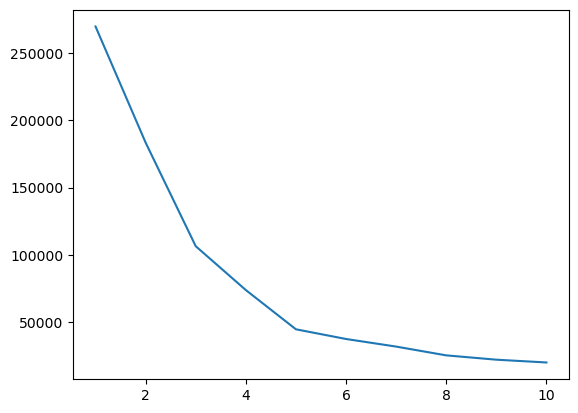

In [114]:
plt.plot(range(1,11),wcss)

In [115]:
km = KMeans(n_clusters=5,random_state=60)
y_pred = km.fit_predict(x)

In [116]:
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

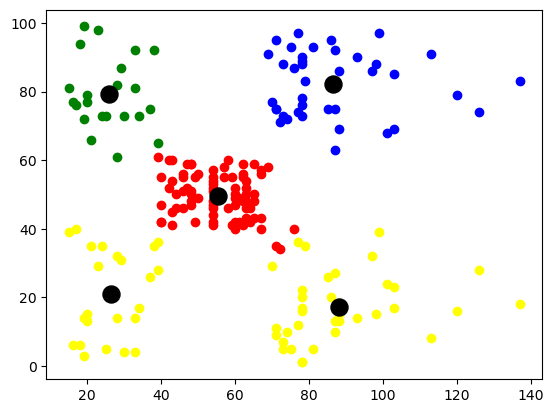

In [117]:
plt.scatter(x[y_pred==0,0], x[y_pred==0,1],c='red')
plt.scatter(x[y_pred==1,0], x[y_pred==1,1],c='yellow')
plt.scatter(x[y_pred==2,0], x[y_pred==2,1],c='blue')
plt.scatter(x[y_pred==3,0], x[y_pred==3,1],c='yellow')
plt.scatter(x[y_pred==4,0], x[y_pred==4,1],c='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',s=150)

# Iris Dataset

## KNN from Scratch

In [118]:
x,y = load_iris(return_X_y=True)

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=69)

In [120]:
k=5
def knn_scratch(x,x_train,y_train,k):
    result=[]
    for i in x:
        arr = np.sqrt(np.sum((i-x_train)**2,axis=1))
        labels = y_train[np.argsort(arr)]
        label = mode(labels[:k])
        result.append(int(label[0]))
    result=np.array(result)
    return result

In [121]:
y_pred = knn_scratch(x_test,x_train,y_train,k)
print((y_test==y_pred).sum() / (y_test.shape[0]))

0.9777777777777777


In [122]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(knn.score(x_test,y_test))
print(classification_report(y_test,y_pred))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## KMeans from Scratch

In [123]:
pca = PCA(n_components=2)
x = pca.fit_transform(x)

<Axes: >

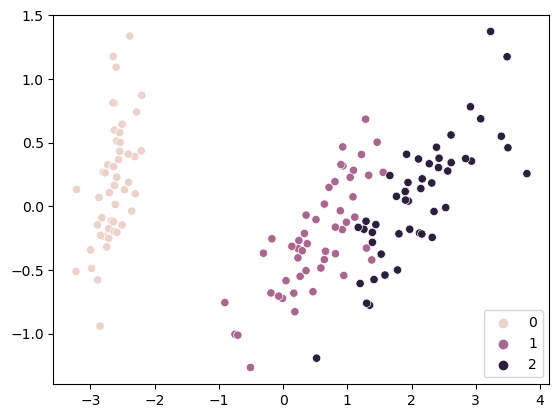

In [124]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

# PCA From scratch

In [125]:
x

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [126]:
cov_mat = np.cov(x,rowvar=False)
cov_mat

array([[4.22824171e+00, 1.95148382e-17],
       [1.95148382e-17, 2.42670748e-01]])

In [127]:
eig_values,eig_vectors = np.linalg.eig(cov_mat)

In [128]:
sort = np.argsort(eig_values)[::-1]
sort_eigenvalues = eig_values[sort]
sort_eigenvectors = eig_vectors[:,sort]

In [129]:
comp = 2
sort_eigenvectors = sort_eigenvectors[:,0:comp]
reduced = np.dot(sort_eigenvectors.transpose(),x.transpose()).transpose()

In [130]:
reduced=reduced.real

In [131]:
reduced

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

# Boston Dataset - ANN Scratch

In [132]:
data = pd.read_csv("boston.csv")

In [133]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [134]:
y=y.reshape(-1,1)

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=69)

In [136]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [137]:
def sigmoid(x,derivative=False):
    if derivative:
        return x*(1-x)
    else:
        return (1/(1+np.exp(-x)))

In [138]:
class NeuralNetwork:
    def __init__(self,inputs,outputs,hidden1,hidden2):
        self.inputs = inputs
        self.outputs = outputs
        self.hidden1 = hidden1
        self.hidden2 = hidden2
        
        #weights
        self.weights1 = np.random.rand(self.inputs,self.hidden1)
        self.weights2 = np.random.rand(self.hidden1,self.hidden2)
        self.weights3 = np.random.rand(self.hidden2,self.outputs)
    def forward_propagation(self,x):    
        self.hidden_layer1 = sigmoid(np.dot(x,self.weights1))
        self.hidden_layer2 = sigmoid(np.dot(self.hidden_layer1,self.weights2))
        self.output_layer = sigmoid(np.dot(self.hidden_layer2,self.weights3))
        return self.output_layer
    def back_propagation(self,x,y,rate):
        #error for output layer
        output_error = y - self.output_layer
        output_derivative = output_error * sigmoid(self.output_layer,derivative=True)
        
        #error for hidden layer 2
        hidden_layer2_error = np.dot(output_derivative,self.weights3.T)
        hidden_layer2_derivative = hidden_layer2_error * sigmoid(self.hidden_layer2,derivative=True)
        
        #error for hidden layer 1
        hidden_layer1_error = np.dot(hidden_layer2_derivative,self.weights2.T)
        hidden_layer1_derivative = hidden_layer1_error * sigmoid(self.hidden_layer1,derivative=True)
        
        #update weights
        self.weights3 += rate * np.dot(self.hidden_layer2.T,output_derivative)
        self.weights2 += rate * np.dot(self.hidden_layer1.T,hidden_layer2_derivative)
        self.weights1 += rate * np.dot(x.T,hidden_layer1_derivative)    

In [139]:
epoch = 100000
neural_model = NeuralNetwork(x_train.shape[1],1,10,5)
for i in range (epoch):
    neural_model.forward_propagation(x_train)
    neural_model.back_propagation(x_train,y_train.reshape(-1,1),0.01)

In [140]:
y_pred = neural_model.forward_propagation(x_test).flatten()

In [141]:
mse = mean_squared_error(y_pred,y_test)

In [142]:
mse

542.4973684834558

In [143]:
r2_score(y_pred,y_test)

-8.213084766273784e+18

# Recommendation System

## Content Based

In [144]:
data_rating = pd.read_csv('rating.csv')

In [145]:
data_anime = pd.read_csv('anime.csv')

In [146]:
data_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [147]:
data_anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [148]:
data = pd.merge(data_anime,data_rating,on='anime_id')

In [149]:
data

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [150]:
tf = TfidfVectorizer()

In [151]:
dict = pd.DataFrame(data=data_anime[['name','genre']])

In [152]:
dict

,name,genre
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,Steins;Gate,"Sci-Fi, Thriller"
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai
12290,Under World,Hentai
12291,Violence Gekiga David no Hoshi,Hentai
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai


In [153]:
dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    12294 non-null  object
 1   genre   12232 non-null  object
dtypes: object(2)
memory usage: 192.2+ KB


In [154]:
dict.dropna(inplace=True)
dict.drop_duplicates(inplace=True)

In [155]:
matrix = tf.fit_transform(dict['genre'])

In [156]:
matrix.shape

(12232, 47)

In [157]:
lin_mat = linear_kernel(matrix,matrix)

In [158]:
x = pd.Series(dict.index,index=dict['name'])

In [159]:
x.unique().sum()

75006255

In [160]:
x.duplicated().sum()

0

In [161]:
def content(name):
    anim = x[name]
    sim_score = list(enumerate(lin_mat[anim]))
    sim_score = sorted(sim_score,key=lambda x: x[1],reverse=True)
    sim_score = sim_score[1:15]
    anim = [i[0] for i in sim_score]
    return dict['name'].iloc[anim]

In [162]:
content('Naruto')

615                                    Naruto: Shippuuden
841                                                Naruto
1103    Boruto: Naruto the Movie - Naruto ga Hokage ni...
1343                                          Naruto x UT
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
1573    Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
2458                 Naruto Shippuuden: Sunny Side Battle
2997    Naruto Soyokazeden Movie: Naruto to Mashin to ...
7628                              Kyutai Panic Adventure!
784            Naruto: Shippuuden Movie 6 - Road to Ninja
1796                                       Rekka no Honoo
2416    Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...
4576                    Street Fighter Zero The Animation
206                                         Dragon Ball Z
Name: name, dtype: object

## Collabrative

In [189]:
data_movie = pd.read_csv("Netflix_Dataset_Movie.csv")
data_rating = pd.read_csv("Netflix_Dataset_Rating.csv")

In [190]:
data_movie

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


In [191]:
data_rating

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
...,...,...,...
17337453,520675,3,4496
17337454,1055714,5,4496
17337455,2643029,4,4496
17337456,1559566,3,4496


In [192]:
data = pd.merge(data_rating,data_movie,on="Movie_ID")
data

,User_ID,Rating,Movie_ID,Year,Name
0,712664,5,3,1997,Character
1,1331154,4,3,1997,Character
2,2632461,3,3,1997,Character
3,44937,5,3,1997,Character
4,656399,4,3,1997,Character
...,...,...,...,...,...
17337453,520675,3,4496,1993,Farewell My Concubine
17337454,1055714,5,4496,1993,Farewell My Concubine
17337455,2643029,4,4496,1993,Farewell My Concubine
17337456,1559566,3,4496,1993,Farewell My Concubine


In [193]:
data = data.pivot_table(index='Name',columns='User_ID',values='Rating')

In [194]:
data

User_ID,6,7,79,97,134,169,183,188,195,199,...,2649308,2649328,2649331,2649335,2649336,2649370,2649378,2649388,2649426,2649429
Name,,,,,,,,,,,,,,,,,,,,,
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians II: Patch's London Adventure,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13 Ghosts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yojimbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
Young Black Stallion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Youngblood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
data=data.fillna(0)

In [196]:
score = cosine_similarity(data)

In [197]:
def collaborative (name):
    index = np.where(data.index == name)[0][0]
    l = score[index]
    sort = sorted(list(enumerate(l)),key=lambda x:x[1],reverse=True)
    ind = [i[0] for i in sort[1:15]]
    final = [data.index[i] for i in ind]
    return final

In [198]:
collaborative('Young Black Stallion')

['Where the Red Fern Grows',
 'Brother Bear (Theatrical Widescreen Version)',
 'Around the World in 80 Days',
 'A Cinderella Story',
 'Fly Away Home',
 'Stuart Little 2',
 "101 Dalmatians II: Patch's London Adventure",
 'Tuck Everlasting',
 'The Pacifier',
 'Dinosaur',
 'Spy Kids 2: The Island of Lost Dreams',
 'Free Willy',
 'Scooby-Doo 2: Monsters Unleashed',
 'Freaky Friday']

# Pytorch

In [199]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [200]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [201]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [202]:
col = data.columns
col =[ 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard','Personal Loan']
data = data[col]

In [203]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [204]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=69)

In [205]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [206]:
x_train = torch.from_numpy(x_train).to(torch.float32)
y_train = torch.from_numpy(y_train)

In [207]:
data = TensorDataset(x_train,y_train)
data_load = DataLoader(data,batch_size=5)

In [208]:
for i in data_load:
    print(i)

[tensor([[ 0.4146,  0.3461,  0.4544, -1.2119, -0.9375, -1.0411,  1.9932, -0.3402,
         -0.2515,  0.8216, -0.6453],
        [ 0.7620,  0.8670,  0.4112, -1.2119,  0.4334,  0.1450, -0.5622, -0.3402,
         -0.2515,  0.8216, -0.6453],
        [ 1.5436,  1.4746,  1.4262, -0.3430,  2.8326, -1.0411,  0.3839, -0.3402,
         -0.2515, -1.2171,  1.5496],
        [ 1.0225,  0.6066, -0.1286, -1.2119, -0.3092,  1.3311, -0.5622, -0.3402,
         -0.2515,  0.8216, -0.6453],
        [-1.4092, -1.3032, -1.1436,  0.5259, -0.5948,  1.3311,  0.5985, -0.3402,
         -0.2515, -1.2171, -0.6453]]), tensor([0, 0, 0, 0, 0])]
[tensor([[ 0.6751,  0.7802,  1.2534, -0.3430, -0.9375, -1.0411,  3.3685, -0.3402,
         -0.2515, -1.2171, -0.6453],
        [ 1.2831,  1.2142,  0.7783, -0.3430,  0.0336, -1.0411, -0.5622, -0.3402,
         -0.2515,  0.8216, -0.6453],
        [-0.7145, -0.6087, -0.3230, -1.2119, -0.2521,  1.3311, -0.5622, -0.3402,
         -0.2515, -1.2171,  1.5496],
        [ 0.9357,  1.0406, 

[tensor([[ 0.5883,  0.6066,  0.1305, -1.2119, -0.3663,  1.3311, -0.5622, -0.3402,
          3.9758,  0.8216,  1.5496],
        [-1.0619, -1.1296,  0.5840, -1.2119,  0.4334,  0.1450,  1.7104, -0.3402,
         -0.2515, -1.2171, -0.6453],
        [-0.4539, -0.4351, -0.0207,  0.5259,  0.6048, -1.0411, -0.5622, -0.3402,
         -0.2515,  0.8216,  1.5496],
        [-0.7145, -0.6087,  0.1089,  1.3949, -1.0518,  0.1450,  2.1688, -0.3402,
         -0.2515,  0.8216, -0.6453],
        [-0.9750, -0.9560,  0.4112, -1.2119, -1.1089, -1.0411, -0.5622, -0.3402,
         -0.2515,  0.8216, -0.6453]]), tensor([0, 0, 0, 0, 0])]
[tensor([[-0.3671, -0.4351, -0.4526, -1.2119, -0.7090,  1.3311, -0.5622, -0.3402,
         -0.2515,  0.8216, -0.6453],
        [ 1.0225,  1.0406, -0.7549,  1.3949, -0.5948, -1.0411, -0.5622, -0.3402,
         -0.2515,  0.8216,  1.5496],
        [ 0.5014,  0.6066, -1.3379,  0.5259, -0.8804, -1.0411, -0.5622,  2.9391,
          3.9758,  0.8216,  1.5496],
        [ 0.9357,  0.8670, 

[tensor([[ 0.0672,  0.1725, -0.4741, -0.3430,  0.0907,  1.3311,  1.5934, -0.3402,
         -0.2515, -1.2171, -0.6453],
        [ 0.6751,  0.6066,  0.0225, -1.2119, -0.0236,  0.1450, -0.5622, -0.3402,
         -0.2515,  0.8216, -0.6453],
        [-1.3224, -1.3032,  2.0956, -0.3430, -0.0236,  0.1450, -0.5622, -0.3402,
         -0.2515, -1.2171, -0.6453],
        [ 1.4568,  1.3878,  0.3248, -0.3430,  0.0336, -1.0411, -0.5622, -0.3402,
         -0.2515,  0.8216,  1.5496],
        [ 1.1962,  1.3010, -0.3230,  1.3949, -0.4234,  0.1450, -0.5622, -0.3402,
         -0.2515,  0.8216, -0.6453]]), tensor([0, 0, 1, 0, 0])]
[tensor([[ 1.3699,  1.3010, -0.2798, -1.2119, -0.1949, -1.0411, -0.5622, -0.3402,
         -0.2515, -1.2171, -0.6453],
        [-0.3671, -0.3483, -0.4741, -0.3430,  0.1478,  1.3311, -0.5622, -0.3402,
         -0.2515,  0.8216, -0.6453],
        [-1.3224, -1.2164, -0.9492, -1.2119, -0.8804,  1.3311, -0.5622, -0.3402,
         -0.2515,  0.8216,  1.5496],
        [ 0.8488,  0.9538, 

[tensor([[ 1.1962,  1.3010,  0.3680, -0.3430, -0.1949, -1.0411, -0.5622,  2.9391,
         -0.2515, -1.2171,  1.5496],
        [ 1.2831,  1.2142, -0.4310,  0.5259, -0.9375,  0.1450, -0.5622, -0.3402,
         -0.2515,  0.8216,  1.5496],
        [-0.8882, -0.9560, -0.7333,  0.5259, -0.5948, -1.0411, -0.5622, -0.3402,
         -0.2515,  0.8216, -0.6453],
        [-0.8882, -0.9560,  0.1089,  1.3949,  0.1478,  0.1450, -0.5622, -0.3402,
         -0.2515, -1.2171, -0.6453],
        [ 0.9357,  1.0406, -1.1220, -1.2119, -0.4234,  1.3311, -0.5622, -0.3402,
         -0.2515,  0.8216,  1.5496]]), tensor([0, 0, 0, 0, 0])]
[tensor([[ 1.1962,  1.3010,  0.7999, -1.2119,  1.3474, -1.0411, -0.5622, -0.3402,
         -0.2515,  0.8216, -0.6453],
        [-0.7145, -0.7823, -0.4957,  0.5259,  0.0907, -1.0411, -0.5622, -0.3402,
         -0.2515,  0.8216,  1.5496],
        [-0.5408, -0.4351,  0.3680, -0.3430, -0.1378,  0.1450,  0.9106, -0.3402,
         -0.2515, -1.2171, -0.6453],
        [ 0.5883,  0.4329, 

[tensor([[-1.1487e+00, -1.0428e+00, -6.9009e-01, -1.2119e+00, -9.9467e-01,
          1.3311e+00,  4.3270e-01, -3.4024e-01, -2.5152e-01,  8.2161e-01,
         -6.4531e-01],
        [-1.1487e+00, -1.0428e+00, -3.4458e-01,  5.2592e-01,  3.3560e-02,
         -1.0411e+00,  3.1565e-01, -3.4024e-01, -2.5152e-01,  8.2161e-01,
         -6.4531e-01],
        [-7.1446e-01, -7.8234e-01, -2.7980e-01,  5.2592e-01, -5.9480e-01,
          1.4500e-01, -5.6215e-01, -3.4024e-01, -2.5152e-01, -1.2171e+00,
         -6.4531e-01],
        [-5.4076e-01, -5.2192e-01, -7.3328e-01, -1.2119e+00,  3.1918e-01,
          1.3311e+00, -5.6215e-01, -3.4024e-01, -2.5152e-01,  8.2161e-01,
         -6.4531e-01],
        [ 6.7177e-02, -1.0851e-03, -7.5487e-01, -1.2119e+00, -9.9467e-01,
         -1.0411e+00, -5.6215e-01, -3.4024e-01, -2.5152e-01, -1.2171e+00,
         -6.4531e-01]]), tensor([0, 0, 0, 0, 0])]
[tensor([[ 1.4568,  1.4746, -0.3446,  1.3949, -0.1378, -1.0411, -0.5622, -0.3402,
         -0.2515,  0.8216, -0.6453]

### Multilayer Perceptron model

In [209]:
class NeuralNet(nn.Module):
    def __init__(self,x,h,y):
        super().__init__()
        self.l1 = nn.Linear(x,h)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(h,y)
    def forward(self,val):
        val = self.l1(val)
        val = self.relu(val)
        val = self.l2(val)
        return val

In [210]:
model = NeuralNet(11,11,2)

In [211]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(),lr=0.003)

In [212]:
# Accuracy 
def fitness_function(output,Y_train):
    
  
    correct_count = (torch.argmax(output, dim=1) == Y_train).to(torch.float32)
    #print(correct_count.sum())
    training_accuracy = correct_count.sum().item()/len(data_load.dataset)
    return training_accuracy

In [213]:
epoch = 500

for i in range(epoch):
    t_correct=0
    t_samples=0
    for x1,y1 in data_load:
        y_pred = model(x1)
        loss = criterion(y_pred,y1)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct = (torch.argmax(y_pred,dim=1)==y1).to(torch.float32)
        t_correct += correct.sum()
        t_samples +=len(x1)
        
    accuracy = t_correct / t_samples
           
    print(accuracy)

tensor(0.9415)
tensor(0.9722)
tensor(0.9740)
tensor(0.9762)
tensor(0.9775)
tensor(0.9795)
tensor(0.9795)
tensor(0.9803)
tensor(0.9800)
tensor(0.9815)
tensor(0.9820)
tensor(0.9822)
tensor(0.9822)
tensor(0.9822)
tensor(0.9837)
tensor(0.9837)
tensor(0.9852)
tensor(0.9847)


KeyboardInterrupt: 

# Keras

In [218]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [219]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [220]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [221]:
col = data.columns
col =[ 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard','Personal Loan']
data = data[col]

In [222]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [223]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=69)

In [224]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [230]:
model1 = Sequential([Dense(units=16,activation=tensorflow.nn.relu),Dense(units=1,activation=tensorflow.nn.sigmoid)])

In [231]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [232]:
model1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics='accuracy')

In [233]:
model1.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
125/125 [==============================] - 1s 1ms/step - loss: 0.4471 - accuracy: 0.8510
Epoch 2/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2558 - accuracy: 0.9243
Epoch 3/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1898 - accuracy: 0.9358
Epoch 4/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1567 - accuracy: 0.9457
Epoch 5/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9535
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1221 - accuracy: 0.9585
Epoch 7/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9617
Epoch 8/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9640
Epoch 9/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9680
Epoch 10/50
125/125 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9700